<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [70]:
# insert code here

import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
data = sklearn.datasets.load_diabetes(as_frame=True)

In [4]:
data

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

### Prepare input data

In [5]:
# insert code here
target_df = data['target']
data_df = data['data']

In [66]:
Y = target_df.to_numpy()
X = data_df.to_numpy()

In [6]:
target_df.isnull().sum()

0

In [7]:
data_df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

### Split the data (training/test)

In [68]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-1.9579524 , -0.9345682 , -0.83892285, ..., -0.84249909,
         0.03547411, -0.60641368],
       [ 0.0287263 , -0.9345682 , -0.1169913 , ..., -0.84249909,
        -1.37998654, -1.11683581],
       [-1.32221521,  1.07001287,  1.23371934, ..., -0.84249909,
        -0.93492985, -0.09599155],
       ...,
       [ 0.0287263 , -0.9345682 , -0.02383885, ..., -0.84249909,
        -0.18144214, -0.26613226],
       [ 0.82339778,  1.07001287,  0.25561853, ..., -0.0569769 ,
        -0.37871413,  0.15921952],
       [-0.130208  ,  1.07001287,  0.09260173, ..., -0.84249909,
        -0.87461414, -1.79739866]])

In [80]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler.fit(y_train)
scaler.transform(y_train)
scaler.transform(y_test)

array([[ 0.4764918 ],
       [-1.54288365],
       [ 0.50271746],
       [ 0.96166642],
       [-1.31996558],
       [ 0.9485536 ],
       [ 1.68287194],
       [-0.03490847],
       [-0.75611399],
       [ 1.87956436],
       [-0.91346792],
       [ 1.68287194],
       [-0.52008309],
       [ 1.21081015],
       [-1.08393468],
       [-0.93969358],
       [-0.34961634],
       [ 0.20112242],
       [-0.06113413],
       [ 0.83053815],
       [ 2.12870808],
       [ 1.22392298],
       [-0.08735978],
       [-1.17572447],
       [-0.33650351],
       [-0.86101661],
       [ 1.56485649],
       [ 0.67318422],
       [-0.90035509],
       [ 0.06999415],
       [ 1.65664629],
       [-0.06113413],
       [ 0.01754284],
       [-1.17572447],
       [ 1.2370358 ],
       [ 1.0927947 ],
       [-0.96591923],
       [ 1.10590753],
       [-1.62156061],
       [ 1.7090976 ],
       [-0.46763178],
       [ 1.43372822],
       [-0.76922682],
       [-1.25440144],
       [ 0.67318422],
       [ 1

### Create the model's architecture

In [106]:
# insert code here
base_model = Sequential()
base_model.add(Dense(10, input_dim = 10, kernel_initializer='he_normal', activation ='relu'))
base_model.add(Dense(1, activation = 'linear'))
base_model.compile(loss='mean_squared_error', optimizer='adam')

In [105]:

deep_model = Sequential()
deep_model.add(Dense(10, input_dim = 10, kernel_initializer='he_normal', activation ='relu'))
deep_model.add(Dense(5, kernel_initializer='he_normal', activation='relu'))
deep_model.add(Dense(3, kernel_initializer='he_normal', activation='relu'))
deep_model.add(Dense(1, activation ='linear'))
deep_model.compile(loss='mean_squared_error', optimizer='adam')


### Compile the model

In [11]:
# model has been compiled above

### Fit the training data

A single layer model

In [148]:
%%time
#base_nn = KerasRegressor(build_fn = base_model, epochs = 300, batch_size = 10, verbose=1)
base_result = base_model.fit(X_train, y_train, epochs=800, batch_size = 20, verbose=1)

Epoch 1/800
15/15 [==============================] - 0s 2ms/step - loss: 2832.3364
Epoch 2/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.8174
Epoch 3/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.9258
Epoch 4/800
15/15 [==============================] - 0s 2ms/step - loss: 2832.2292
Epoch 5/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.7483
Epoch 6/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.6028
Epoch 7/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.3672
Epoch 8/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.5618
Epoch 9/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.1831
Epoch 10/800
15/15 [==============================] - 0s 2ms/step - loss: 2831.2764
Epoch 11/800
15/15 [==============================] - 0s 2ms/step - loss: 2830.9844
Epoch 12/800
15/15 [==============================] - 0s 2ms/step - loss: 2830.9836
E

15/15 [==============================] - 0s 2ms/step - loss: 2820.5947
Epoch 195/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.4497
Epoch 196/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.7053
Epoch 197/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.9702
Epoch 198/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.7837
Epoch 199/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.4534
Epoch 200/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.1917
Epoch 201/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.3806
Epoch 202/800
15/15 [==============================] - 0s 2ms/step - loss: 2821.4021
Epoch 203/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.2742
Epoch 204/800
15/15 [==============================] - 0s 2ms/step - loss: 2820.3176
Epoch 205/800
15/15 [==============================] - 0s 2ms/step - loss: 2820

15/15 [==============================] - 0s 2ms/step - loss: 2814.9480
Epoch 387/800
15/15 [==============================] - 0s 2ms/step - loss: 2815.1138
Epoch 388/800
15/15 [==============================] - 0s 2ms/step - loss: 2815.1362
Epoch 389/800
15/15 [==============================] - 0s 2ms/step - loss: 2815.1353
Epoch 390/800
15/15 [==============================] - 0s 2ms/step - loss: 2814.9717
Epoch 391/800
15/15 [==============================] - 0s 2ms/step - loss: 2814.8855
Epoch 392/800
15/15 [==============================] - 0s 2ms/step - loss: 2815.1880
Epoch 393/800
15/15 [==============================] - 0s 2ms/step - loss: 2814.7129
Epoch 394/800
15/15 [==============================] - 0s 2ms/step - loss: 2815.2173
Epoch 395/800
15/15 [==============================] - 0s 2ms/step - loss: 2814.8789
Epoch 396/800
15/15 [==============================] - 0s 2ms/step - loss: 2814.7173
Epoch 397/800
15/15 [==============================] - 0s 2ms/step - loss: 2814

15/15 [==============================] - 0s 2ms/step - loss: 2812.1213
Epoch 579/800
15/15 [==============================] - 0s 2ms/step - loss: 2811.9656
Epoch 580/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.1997
Epoch 581/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.7039
Epoch 582/800
15/15 [==============================] - 0s 2ms/step - loss: 2811.9355
Epoch 583/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.1162
Epoch 584/800
15/15 [==============================] - 0s 2ms/step - loss: 2811.9663
Epoch 585/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.1455
Epoch 586/800
15/15 [==============================] - 0s 2ms/step - loss: 2811.8953
Epoch 587/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.0947
Epoch 588/800
15/15 [==============================] - 0s 2ms/step - loss: 2812.1831
Epoch 589/800
15/15 [==============================] - 0s 2ms/step - loss: 2811

15/15 [==============================] - 0s 3ms/step - loss: 2810.3845
Epoch 771/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.6709
Epoch 772/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.2581
Epoch 773/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.7402
Epoch 774/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.3330
Epoch 775/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.2285
Epoch 776/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.1953
Epoch 777/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.3052
Epoch 778/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.2458
Epoch 779/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.3179
Epoch 780/800
15/15 [==============================] - 0s 2ms/step - loss: 2810.1602
Epoch 781/800
15/15 [==============================] - 0s 2ms/step - loss: 2810

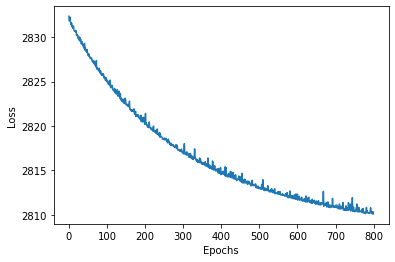

In [150]:
base_history = base_result.history['loss']
fig,ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax = plt.plot(base_history)

A 3 layer model

In [157]:
#deep_nn = KerasRegressor(build_fn = deep_model, epochs=300, batch_size=10, verbose=1)
deep_result = deep_model.fit(X_train, y_train, epochs = 800, batch_size = 20, verbose=1)

Epoch 1/800
15/15 [==============================] - 0s 3ms/step - loss: 2653.4883
Epoch 2/800
15/15 [==============================] - 0s 3ms/step - loss: 2650.4429
Epoch 3/800
15/15 [==============================] - 0s 3ms/step - loss: 2648.0039
Epoch 4/800
15/15 [==============================] - 0s 3ms/step - loss: 2645.1577
Epoch 5/800
15/15 [==============================] - 0s 3ms/step - loss: 2641.9883
Epoch 6/800
15/15 [==============================] - 0s 3ms/step - loss: 2645.9829
Epoch 7/800
15/15 [==============================] - 0s 3ms/step - loss: 2643.9968
Epoch 8/800
15/15 [==============================] - 0s 3ms/step - loss: 2644.5247
Epoch 9/800
15/15 [==============================] - 0s 3ms/step - loss: 2642.0464
Epoch 10/800
15/15 [==============================] - 0s 3ms/step - loss: 2645.3376
Epoch 11/800
15/15 [==============================] - 0s 3ms/step - loss: 2642.3137
Epoch 12/800
15/15 [==============================] - 0s 3ms/step - loss: 2641.8015
E

15/15 [==============================] - 0s 3ms/step - loss: 2581.4712
Epoch 195/800
15/15 [==============================] - 0s 3ms/step - loss: 2580.1531
Epoch 196/800
15/15 [==============================] - 0s 3ms/step - loss: 2581.7085
Epoch 197/800
15/15 [==============================] - 0s 3ms/step - loss: 2583.2944
Epoch 198/800
15/15 [==============================] - 0s 3ms/step - loss: 2585.2507
Epoch 199/800
15/15 [==============================] - 0s 3ms/step - loss: 2578.9990
Epoch 200/800
15/15 [==============================] - 0s 3ms/step - loss: 2579.5498
Epoch 201/800
15/15 [==============================] - 0s 3ms/step - loss: 2578.0652
Epoch 202/800
15/15 [==============================] - 0s 3ms/step - loss: 2579.3821
Epoch 203/800
15/15 [==============================] - 0s 3ms/step - loss: 2580.1389
Epoch 204/800
15/15 [==============================] - 0s 3ms/step - loss: 2580.2195
Epoch 205/800
15/15 [==============================] - 0s 3ms/step - loss: 2579

15/15 [==============================] - 0s 3ms/step - loss: 2550.5305
Epoch 387/800
15/15 [==============================] - 0s 3ms/step - loss: 2550.0349
Epoch 388/800
15/15 [==============================] - 0s 3ms/step - loss: 2553.9399
Epoch 389/800
15/15 [==============================] - 0s 3ms/step - loss: 2552.7163
Epoch 390/800
15/15 [==============================] - 0s 3ms/step - loss: 2552.5205
Epoch 391/800
15/15 [==============================] - 0s 2ms/step - loss: 2549.6353
Epoch 392/800
15/15 [==============================] - 0s 3ms/step - loss: 2548.8745
Epoch 393/800
15/15 [==============================] - 0s 3ms/step - loss: 2549.9561
Epoch 394/800
15/15 [==============================] - 0s 3ms/step - loss: 2548.8635
Epoch 395/800
15/15 [==============================] - 0s 3ms/step - loss: 2551.8359
Epoch 396/800
15/15 [==============================] - 0s 3ms/step - loss: 2552.0354
Epoch 397/800
15/15 [==============================] - 0s 3ms/step - loss: 2548

15/15 [==============================] - 0s 3ms/step - loss: 2540.0691
Epoch 579/800
15/15 [==============================] - 0s 3ms/step - loss: 2540.2568
Epoch 580/800
15/15 [==============================] - 0s 3ms/step - loss: 2537.7646
Epoch 581/800
15/15 [==============================] - 0s 3ms/step - loss: 2535.2983
Epoch 582/800
15/15 [==============================] - 0s 3ms/step - loss: 2534.9883
Epoch 583/800
15/15 [==============================] - 0s 3ms/step - loss: 2535.9556
Epoch 584/800
15/15 [==============================] - 0s 3ms/step - loss: 2537.6443
Epoch 585/800
15/15 [==============================] - 0s 3ms/step - loss: 2534.3635
Epoch 586/800
15/15 [==============================] - 0s 3ms/step - loss: 2533.8354
Epoch 587/800
15/15 [==============================] - 0s 3ms/step - loss: 2536.8213
Epoch 588/800
15/15 [==============================] - 0s 3ms/step - loss: 2535.7964
Epoch 589/800
15/15 [==============================] - 0s 3ms/step - loss: 2535

15/15 [==============================] - 0s 3ms/step - loss: 2527.2478
Epoch 771/800
15/15 [==============================] - 0s 3ms/step - loss: 2534.9307
Epoch 772/800
15/15 [==============================] - 0s 3ms/step - loss: 2530.6138
Epoch 773/800
15/15 [==============================] - 0s 3ms/step - loss: 2527.0962
Epoch 774/800
15/15 [==============================] - 0s 3ms/step - loss: 2527.1531
Epoch 775/800
15/15 [==============================] - 0s 3ms/step - loss: 2527.1670
Epoch 776/800
15/15 [==============================] - 0s 3ms/step - loss: 2529.3328
Epoch 777/800
15/15 [==============================] - 0s 3ms/step - loss: 2527.0005
Epoch 778/800
15/15 [==============================] - 0s 3ms/step - loss: 2532.7356
Epoch 779/800
15/15 [==============================] - 0s 3ms/step - loss: 2527.7351
Epoch 780/800
15/15 [==============================] - 0s 3ms/step - loss: 2529.5369
Epoch 781/800
15/15 [==============================] - 0s 3ms/step - loss: 2529

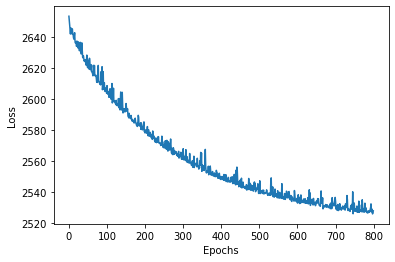

In [158]:
deep_history = deep_result.history['loss']
fig,ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax = plt.plot(deep_history)

In [155]:
base_loss = base_model.evaluate(X_train, y_train, verbose=0)
deep_loss = deep_model.evaluate(X_train, y_train, verbose=0)

In [156]:
print(f'RMSE of base model is {base_loss}')
print(f'RMSE of deep model is {deep_loss}')

RMSE of base model is 2809.93310546875
RMSE of deep model is 2643.280517578125


### Create predictions

In [159]:
# insert code here
y_predicted_base = base_model.predict(X_test)
y_predicted_deep = base_model.predict(X_test)

### Evaluate the model

In [160]:
# insert code here
base_loss_predicted = base_model.evaluate(X_test, y_test, verbose=0)
deep_loss_predicted = deep_model.evaluate(X_test, y_test, verbose=0)

In [161]:
print(f'RMSE of base model is {base_loss_predicted}')
print(f'RMSE of deep model is {deep_loss_predicted}')

RMSE of base model is 3059.14501953125
RMSE of deep model is 3196.54541015625


### Visualisation of cost

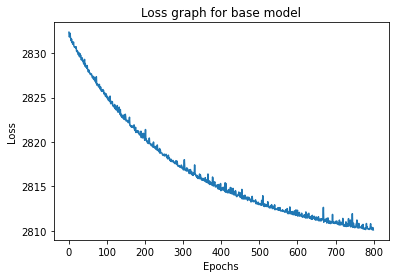

In [164]:
base_history = base_result.history['loss']
fig,ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')b
ax.set_title('Loss graph for base model')
ax = plt.plot(base_history)

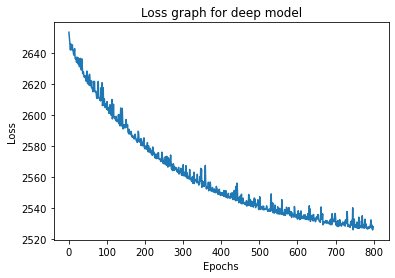

In [165]:
deep_history = deep_result.history['loss']
fig,ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title('Loss graph for deep model')
ax = plt.plot(deep_history)

### Visualisation of residuals

In [179]:
len(y_test)

146

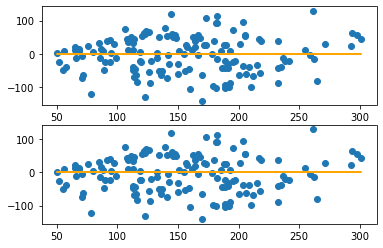

In [198]:
# insert code here
base_residuals = y_predicted_base - y_test
deep_residuals = y_predicted_deep - y_test


x_zero = y_predicted_base
y_zero = np.zeros(len(y_test))
fig, axs = plt.subplots(2, 1)
axs[0].plot(x_zero, y_zero, color ='orange')
axs[0].scatter(y_predicted_base, base_residuals)
axs[1].plot(x_zero, y_zero, color = 'orange')
axs[1].scatter(y_predicted_deep, deep_residuals)





---



---



> > > > > > > > > © 2021 Institute of Data


---



---



